# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
#X = df_wine[selected_features].values
y = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
# prepare dataset to plot pairplot
df_wine_ = df_wine.copy() # copy dataset 
class_ = y 
df_wine_["class"] = class_.tolist() #adding 'classes' to dataset

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

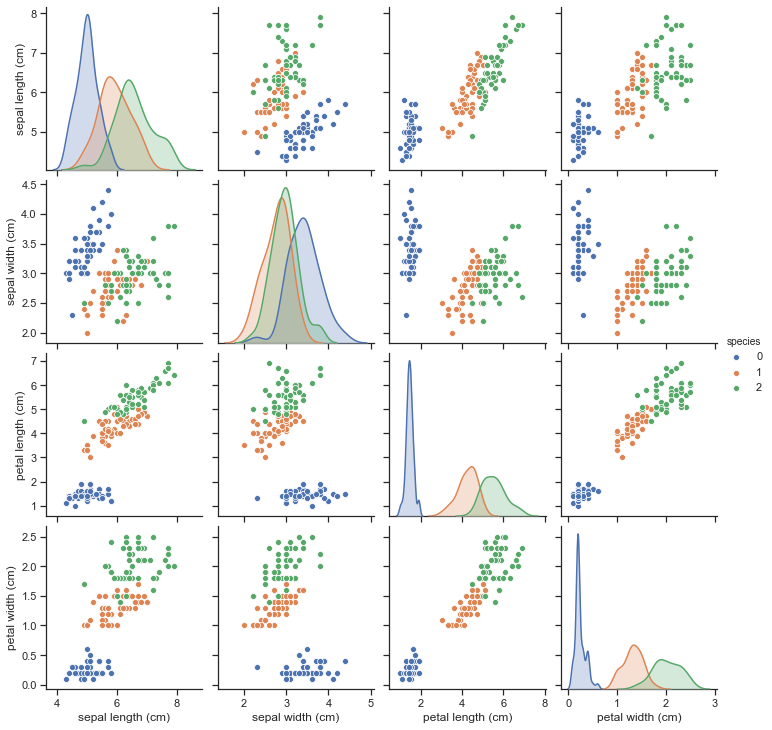

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [3]:
# define plotting function
import seaborn as sns
import pandas as pd
def myplotGrid(x,z):
    
    """
    Input: dataframe and columns that will be plotted
    output: pairplot
    """
    
    sns.set(style="ticks", color_codes=True) # to set a style of the plots
    fig = sns.pairplot(data=x, vars=z,diag_kind = 'hist', hue="class") # to defy a plot and state the inputs
    return fig

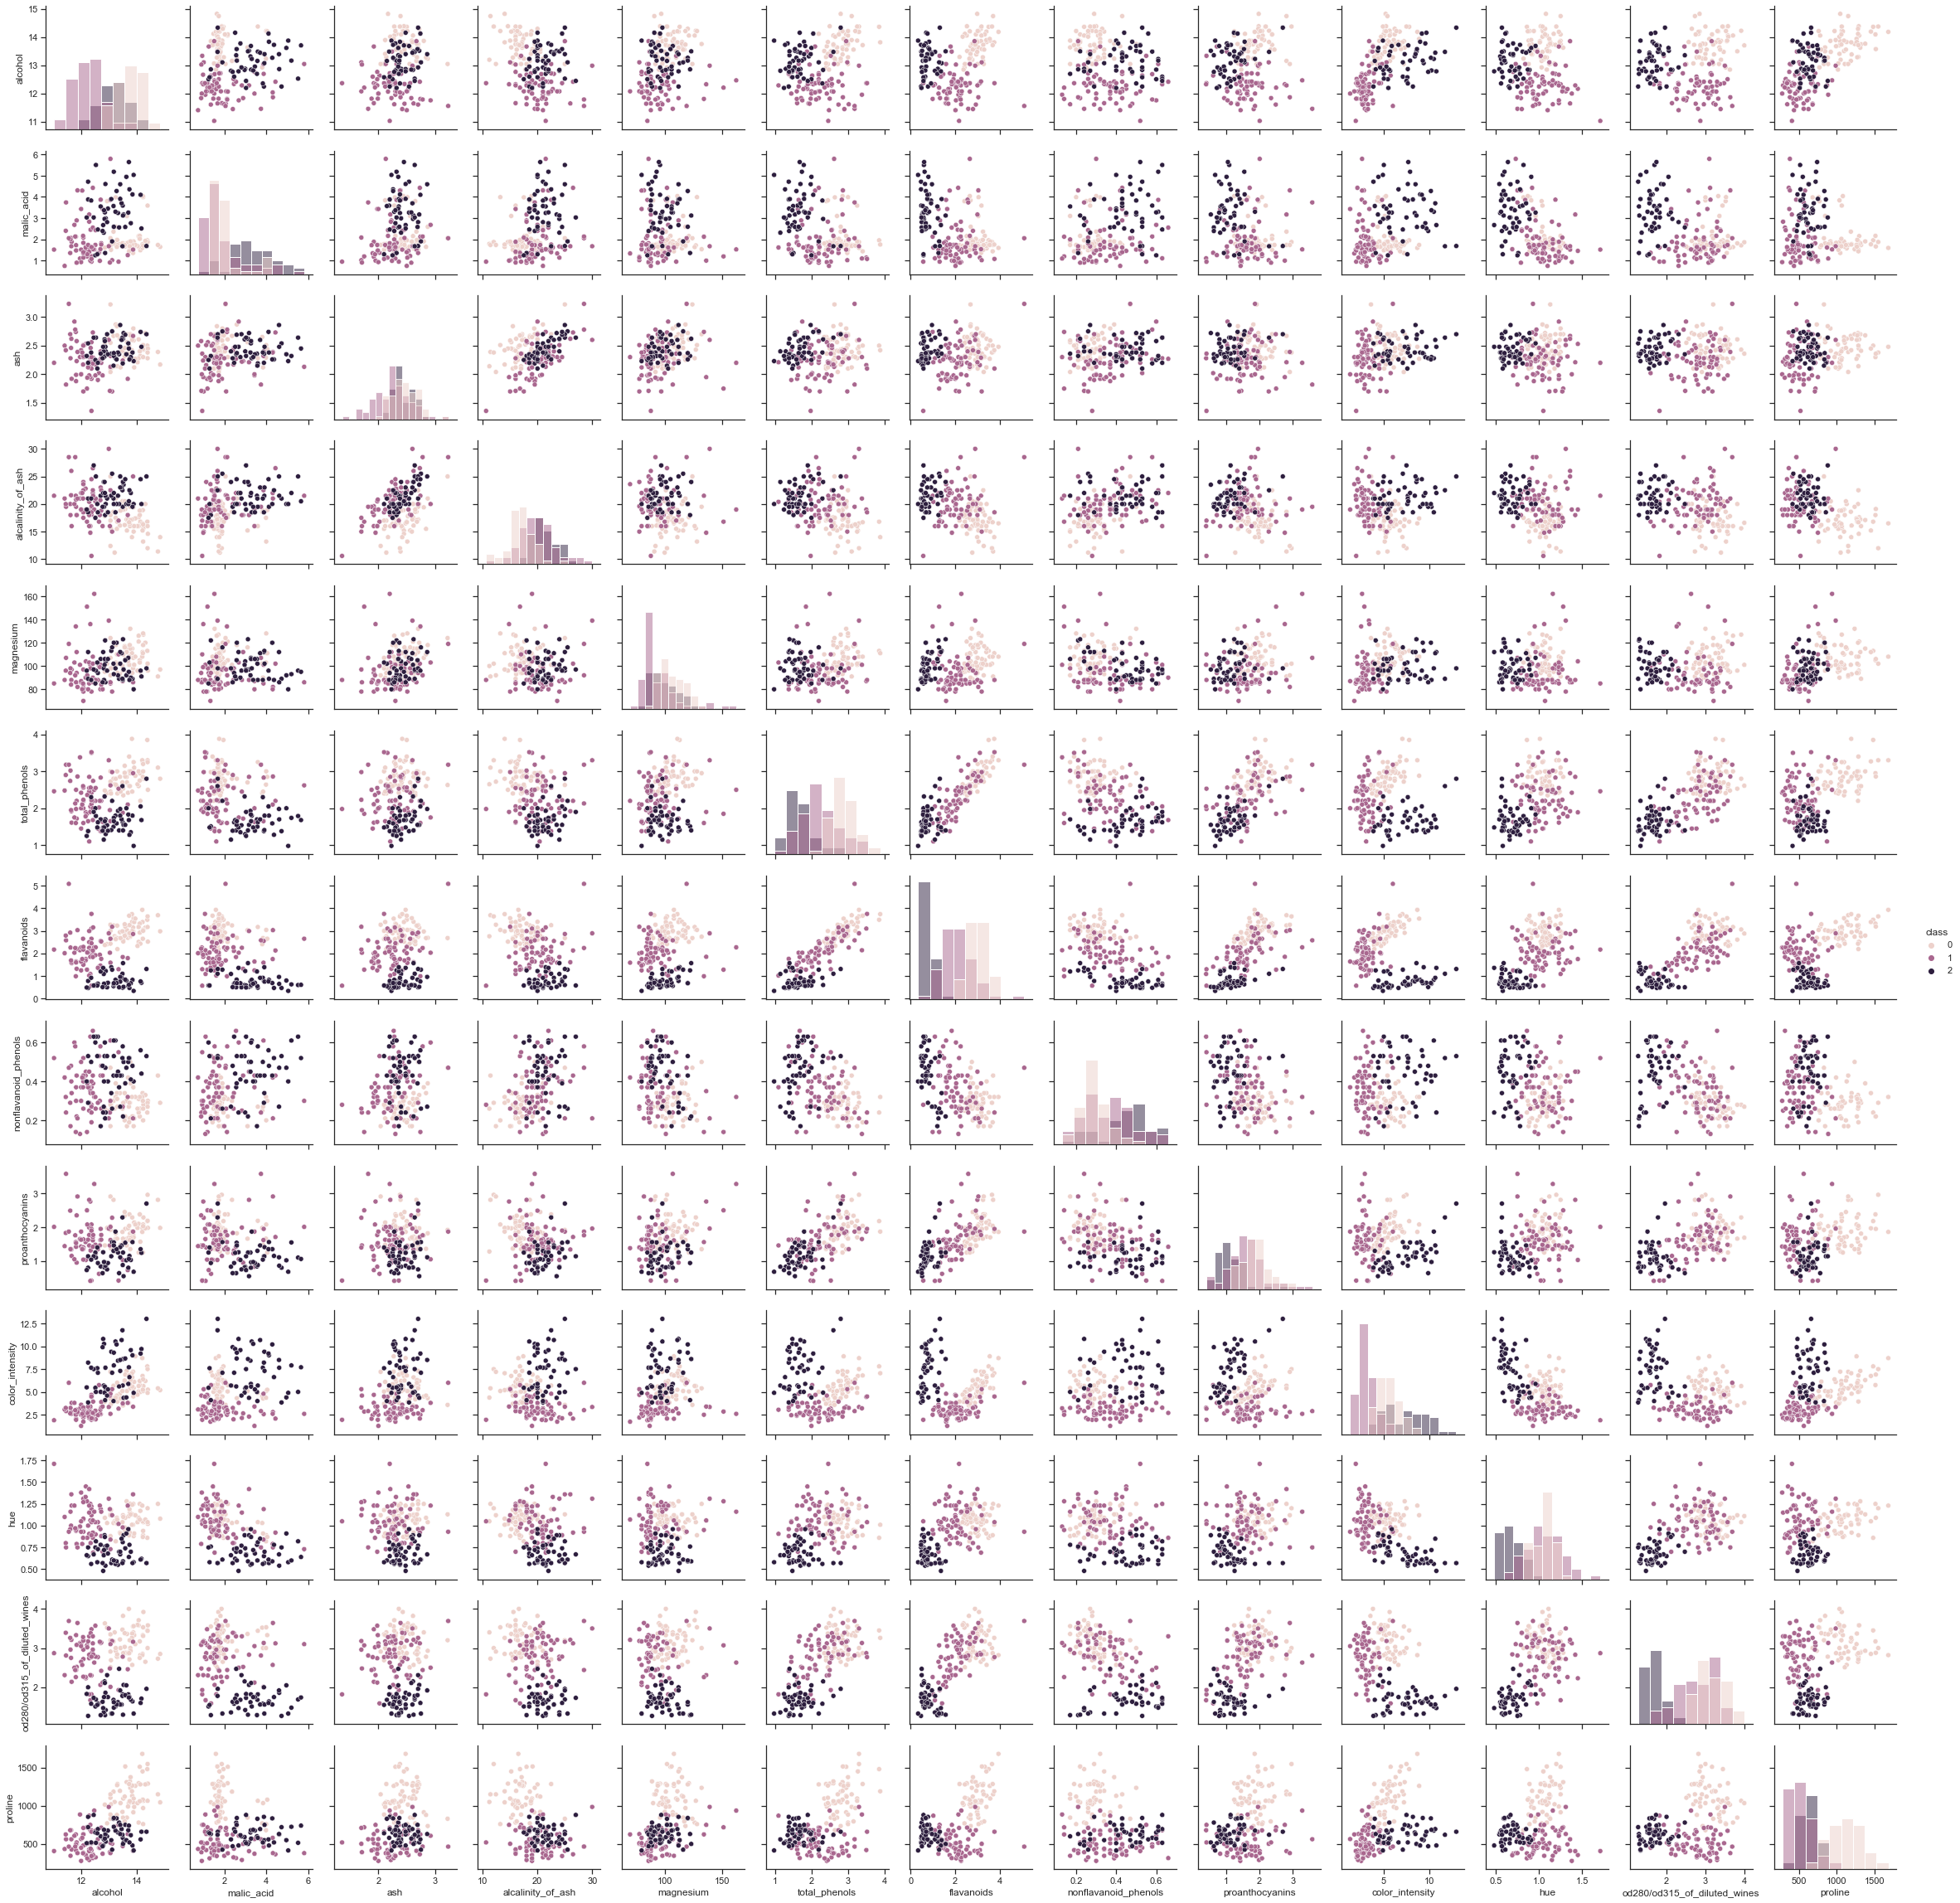

In [4]:
# run the plotting function
# plot all 13 attributes

plot = myplotGrid(df_wine_,df_wine_.columns[0 :13])

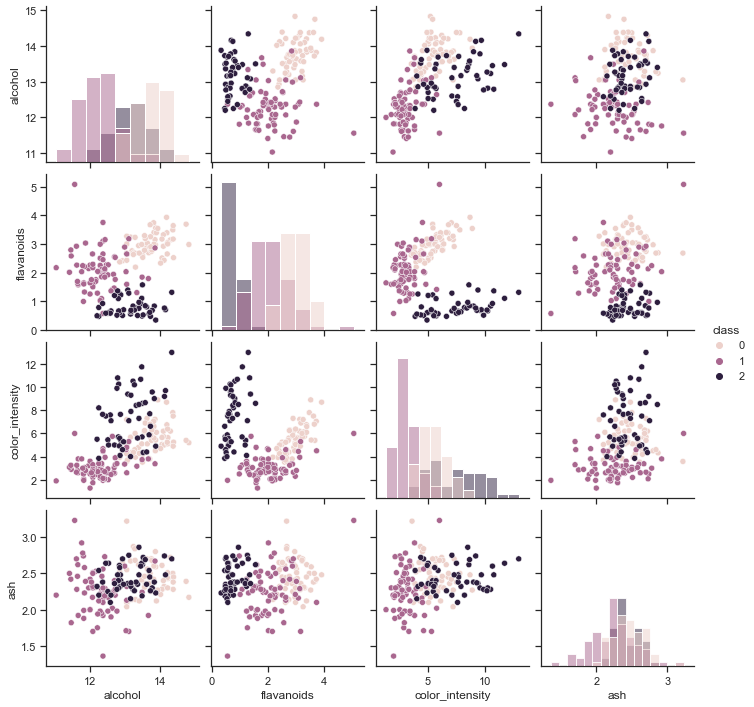

In [5]:
# plot 4 selected attributes
x = df_wine_
selected_features = ['alcohol','flavanoids','color_intensity','ash']
z = df_wine_[selected_features]
myplotGrid(x,z)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [6]:
# noise code 
mySeed = 12345 
np.random.seed(mySeed) 
XN=df_wine+np.random.normal(0,0.5,df_wine.shape) # because I don't want to apply noise to class, therefore, I use the original dataset when adding Gaussin noise

In [7]:
XN["class"] = y.tolist() # then I join the classes column later after added noise

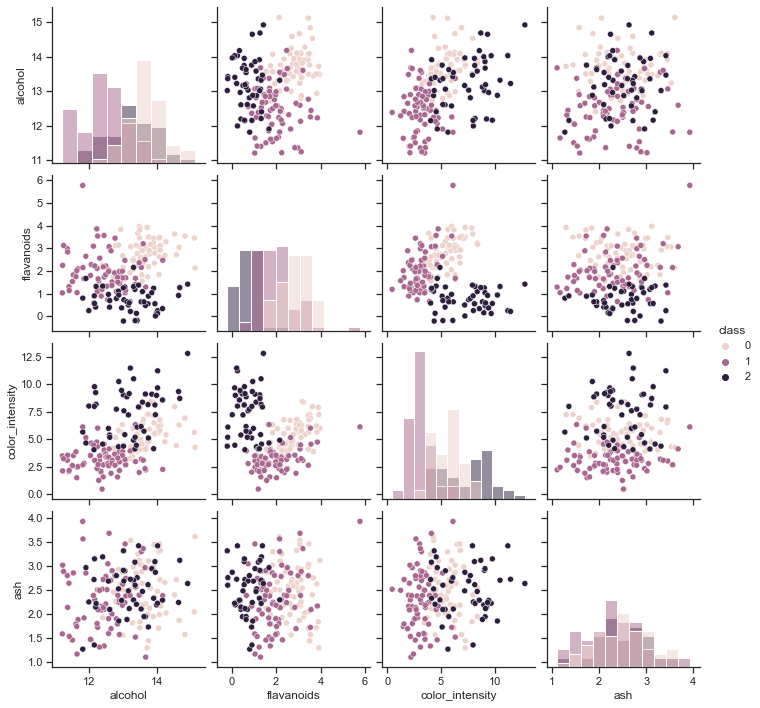

In [8]:
myplotGrid(XN,XN[selected_features])


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: 

If I were to choose only to features, I am going to choose OD280/OD315 of diluted wines and alcohol. Because, their standard deviation values is not too high or not too close to zero. Since the standard deviation measures dispersion of the data in relation to the mean. In my opinion, if I choose features with standard deviation closer to zero, which mean that all the data in the features, their values are close or similar to each other. If I choose data for doing KNN, I think OD280/OD315 of diluted wines and alcohol can be a good choice. In addition, when looking at the graphs in pairplot (with all 13 attributes). We can see that the graphs of OD280/OD315 of diluted wines and alcohol are not too spread out and not too clustered at the center. When looking at points on the graphs, we can preliminary deduce clusters of data on the graphs by just looking at them. 


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

1) From histograms from data with adding noise, we can notice that some histogram bars on the four histograms in the pairplot are taller than the histograms of data without noise. 

2) On data without adding nose seems to have less data than in data adding noise. The extra data is potentailly from the added noises. Therefore, this will make the data on data with adding noise graphs look more scattered. 

3) With data with adding noise, because it have noise added into it, this could make the classification become more difficult than the data without adding noise, especially when applying to kNN classification. Therefore, this could be inferred that with using noisey data, the accuracy of the classification might be lower than the accuracy of classsification using data without noise. As we can see that, the scattered plots of data with noise look more spreaded out than plots of data without noise. And with just looking by eyes, it is harder to deduce clusters from the scattered plots of data with noise. 

4) When looking at the plot, it shows that on both plots of data with noise and data without noise, class_2 has the most data among three classes. 




## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [9]:
# I will choose only 4 selected coulumns to work on

y = wine.target # I set y to be a target column
df_= df_wine[['alcohol','flavanoids','color_intensity','ash']]
X = df_.to_numpy() # to set 4 attributes to numpy array

In [10]:
import random
import numpy as np
from collections import Counter
import math
from math import sqrt

# Distance Functions
def euclidean_distance(a, b):
    
    """ Calculating Euclidean distance
    Input - point a and point b (from rows)
          - calculating square root of the distance, then sum total distance 
    output - square root of the distance (eucildean distance)
    """
    
    return np.sqrt(np.sum((a - b) ** 2)) 

def minkowski_distance(a, b):
    
    """" Calculating Minkowski distance
    input -  point a and point b (from rows)
          - calculate minkowski distance using inkowski parameter (p=1)
    output - minkowski distance
    """
    
    dimension = len(a) # to defy dimension
    distance = 0 # set distance = 0
    for d in range(dimension):
        distance += abs(a[d] - b[d])**1 #already set parameter p =1 for Minkowski distance    
    result = distance**(1/1)
    return result



def my_train_test_split(X, y):
    
    """" To do train test split
    Input - X, y
          - test size between 0 and 1 (in this case already set to 80% of the data)
    Output - train test sets
    """
  
    test_size = int(len(X)*(0.8)) # already set test size as 0.8
    rand_perm = np.random.permutation(X.shape[0]) # to randomly permutate X
    X_train, X_test = np.split(np.take(X,rand_perm,axis=0), [test_size]) # split X_train and X_test
    y_train, y_test = np.split(np.take(y,rand_perm), [test_size]) # split y_train and y_test
    return X_train, X_test, y_train, y_test



def mykNN(X_train, y_train, X_test, k, distance_type):
    
    """  Input:
           - X=training inputs, 
           - y=training outputs, 
           - X=test inputs, 
           - k= number of neighbours, 
           - distance_type= "euclidian" or "minkowski"
        Output:
           - List of predicted values for test inputs
    """
    
    predicted = []  
    for x in X_test:
        neighbours = [[],[]]
        
        #to set distance type 
        if distance_type == "euclidean":
            distance = [euclidean_distance(x, j) for j in X_train]
        elif distance_type=="minkowski":
            distance = [minkowski_distance(x, j) for j in X_train]
        k_nearest_index = np.argsort(distance)[:k] # get index of the smallest k
        k_nearest_labels = [y_train[m] for m in k_nearest_index] #to label the indices
        counts = np.bincount(k_nearest_labels) #count labels
        predicted.append(np.argmax(counts)) #predict what is the most common class
    return np.array(predicted)

# train test split
X_train, X_test, y_train, y_test = my_train_test_split(X, y)

# get predicted values
# using euclidean distance
y_pred = mykNN(X_train, y_train, X_test,5, "euclidean") 

print("Predicted values:", y_pred)
print(y_pred)
print("\n")
print("True values:", y_test)

Predicted values: [0 2 0 1 1 2 0 0 0 1 0 2 0 0 1 1 0 0 1 2 1 2 0 1 0 1 2 2 0 1 2 0 1 2 2 1]
[0 2 0 1 1 2 0 0 0 1 0 2 0 0 1 1 0 0 1 2 1 2 0 1 0 1 2 2 0 1 2 0 1 2 2 1]


True values: [1 2 0 1 1 2 0 0 1 1 0 1 0 0 1 1 0 0 1 2 1 2 0 1 0 1 2 2 1 1 2 0 1 2 2 1]


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [11]:
# confusion matrix

def myConfusionMat(y_test,y_pred,classno):
    
    """"
    Inputs - true values, predicted value, class number
    Outputs - confusion matrix in a numpy array
    """
    
    C= np.zeros((classno,classno),dtype=np.int) #create a matrix with entries = 0
    for i in range(0,len(y_test)): #assign value to C[i,j] by looping over it
            C[y_test[i],y_pred[i]]+=1
    return C # after looping all the result, it will return the updated matrix

print(myConfusionMat(y_test,y_pred,len(np.unique(y))))

[[11  0  0]
 [ 3 12  1]
 [ 0  0  9]]


<ipython-input-11-cd80bae2dd50>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C= np.zeros((classno,classno),dtype=np.int) #create a matrix with entries = 0


In [12]:
# Accuracy

def myAccuracy(y_test,y_pred):
    
    """"
    Inputs - true values and predicted values
    Outputs - accuracy value
    """
    
    correct = np.where(y_test==y_pred, 1, 0 ) # to get the index of an input array
    total = len(y_test) 
    return sum(correct)/total 
    
print("accuracy:",myAccuracy(y_test,y_pred))

accuracy: 0.8888888888888888


Reference source for confusion matrix and accuracy matrix is from:

K-nearest neighbours classification: Model answers from machine learning course page'Solutions to Jupyter Notebooks', university of London https://learn.london.ac.uk/course/view.php?id=585&section=14


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [13]:
def myNestedCrossVal(X,y,kFold,nns,dists,mySeed):
    
    """ 
        Inputs: 
            - number of folds, 
            - range of neighbour values, 
            - distance types: "euclidean","minkowski"
            - random seed.
        Outputs: 
            - list of accuracies, 
            - list of parameters, 
    """
    
    np.random.seed(mySeed)
    accuracy_fold=[]
    parameters_fold=[]
    confusion_matrices=[] # this confusion matrix is for confusion matrix summary
    
    l=list(range(X.shape[0])) 
    index = np.random.permutation(l)
    indices = np.array_split(index, kFold)
    
   
    for i in range(0,kFold):
        testFold = indices[i] #list to save indices of testfold
        trainFold=[] #list to save indices of trainfold
        validationFold=[] #list to save indices for validation fold
        val_indices = (i+1)%kFold
       #loop through val_indices
    
        for j in range(0,len(indices)):
            if (i == j):
                testFold = indices[i] #take val_indices i for testing
            elif (j == val_indices):
                validationFold = indices[val_indices]  #take the next val_indices for validation
            else:
                trainFold.extend(indices[j]) #take  #the next val_indices for validation
    
      
        bestDistance='' #save the best distance
        bestNN=-1  #save the best knn neighbours
        bestAccuracy=-10 #save the best accuracy
       
    # loop through distance and nns
        for d in dists:
            for nn in nns:
                y_pred = mykNN(X[trainFold],y[trainFold],X[validationFold],nn,d) 
                accuracy = myAccuracy(y[validationFold], y_pred)
                if accuracy > bestAccuracy:
                    bestDistance = d
                    bestNN = nn
                    bestAccuracy = accuracy
                    
        trainFold.extend(validationFold)
        
        # To do knn on fold
        y_prediction = mykNN(X[trainFold],y[trainFold], X[testFold], bestNN,bestDistance)
        
        # to calculate accuracy
        accuracy_=myAccuracy(y[testFold],y_prediction)
        accuracy_fold.append(accuracy)
        
        # to append parameters to store
        parameters_fold.append((bestDistance, bestNN))
        nClasses = len(np.unique(y_prediction))
        
        # To calculate and store confusion matrix for further prediction
        confusion_matrix=myConfusionMat(y[testFold],y_prediction,nClasses)
        confusion_matrices.append(confusion_matrix)
       
    return accuracy_fold, parameters_fold, np.array(confusion_matrices)

### Clean data

In [14]:
# Apply nested cross validation on clean data

#defy parameters to use for the function
dists = ["euclidean", "minkowski"]
mySeed = 123456
kFold = 5
accuracies_fold, best_parameters_fold, confusion_matrices = myNestedCrossVal(X,y,kFold,list(range(1,11)),dists,mySeed)

average_accuracy = np.average(accuracies_fold) # to get average accuracy
standard_deviation = np.std(accuracies_fold) # to get std 

<ipython-input-11-cd80bae2dd50>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C= np.zeros((classno,classno),dtype=np.int) #create a matrix with entries = 0


In [15]:
# to prepare data to add to the table
rounded_accuracies=["{0:.2f}".format(i) for i in accuracies_fold] # to round number to 2 decimal places

dist_metrics = [best_parameters_fold[i][0] for i in range(0,len(best_parameters_fold))] # to get the bet distance

nns = [best_parameters_fold[i][1] for i in range(0,len(best_parameters_fold))] # to get best nns


In [16]:
print("Total accuracy:" , average_accuracy)
print("Satndard deviation:", standard_deviation)

Total accuracy: 0.9155555555555555
Satndard deviation: 0.039754220972872664


In [17]:
print("Accuracy:", rounded_accuracies)

Accuracy: ['0.94', '0.86', '0.89', '0.91', '0.97']


In [18]:
print("k:", nns)

k: [3, 1, 1, 1, 2]


In [19]:
print("distance:", dist_metrics)

distance: ['euclidean', 'euclidean', 'euclidean', 'euclidean', 'minkowski']


### noisey data 

In [20]:
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

In [21]:
# Apply nested cross validation on noisey data

noise_accuracies_fold, noise_best_parameters_fold, noise_confusion_matrices = myNestedCrossVal(XN,y,kFold,list(range(1,11)),dists,mySeed)
noise_average_accuracy = np.average(noise_accuracies_fold)
standard_deviation = np.std(noise_accuracies_fold)

<ipython-input-11-cd80bae2dd50>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C= np.zeros((classno,classno),dtype=np.int) #create a matrix with entries = 0


In [22]:
noise_rounded_accuracies=["{0:.2f}".format(i) for i in noise_accuracies_fold] 

noise_dist_metrics=[noise_best_parameters_fold[i][0] for i in range(0,len(noise_best_parameters_fold))]

noise_nns=[noise_best_parameters_fold[i][1] for i in range(0,len(noise_best_parameters_fold))]

In [23]:
print("Total accuracy:" ,noise_average_accuracy)
print("Satndard deviation:", standard_deviation)

Total accuracy: 0.9214285714285714
Satndard deviation: 0.04475796447815476


In [24]:
print("Accuracy:", noise_rounded_accuracies)

Accuracy: ['0.92', '0.86', '0.89', '0.97', '0.97']


In [25]:
print("k:", noise_nns)

k: [7, 6, 9, 6, 3]


In [26]:
print("distance:", noise_dist_metrics)

distance: ['euclidean', 'euclidean', 'euclidean', 'euclidean', 'euclidean']


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.94  |  3 | euclidean  |
| 2 | 0.86  |  1 | euclidean  |
| 3 | 0.89  |  1 | euclidean  |
| 4 | 0.91  |  1 | euclidean  |
| 5 | 0.97  |  2 | minkowski  |
| **total** | 0.915 $\pm$ 0.03975 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.92  |  7 | euclidean  |
| 2 | 0.86  |  6 | euclidean  |
| 3 | 0.89  |  9 | euclidean  |
| 4 | 0.97 |  6 | euclidean  |
| 5 | 0.97  |  3 | euclidean  |
| **total** | 0.921 $\pm$ 0.04476 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [27]:
def myPrecision(confusion_matrix):
    
    """
        Inputs:
            Confusion Matrix
        Outputs:
            List with precision for each class            
    """
    
    classes = np.unique(y) #get classes
    precision = np.zeros(classes.shape) #initiate array matrix zero
    
    #loop through the elements in confusion matrix
    for i in range(0,len(confusion_matrix)):
        tp_sum_fp=0
        for j in classes:
            # sum of true positives and false positive
            tp_sum_fp+=confusion_matrix[j][i]
        class_precision=confusion_matrix[i][i]/tp_sum_fp
        precision[i]=class_precision
    return precision


def myRecall(confusion_matrix):
    
    """ Inputs:
            Confusion Matrix
        outputs:
            List with recall for each class
    """
    
    # get classes
    classes = np.unique(y)
    # results array of zeros
    recall = np.zeros(classes.shape)
    
    # loop over confusion matrixes and calc results 
    for i in range(0,len(confusion_matrix)):
        tp_sum_fn=0
        for j in classes:
            # sum of true positives and false negatives
            tp_sum_fn+=confusion_matrix[i][j]
    return recall

In [28]:
def summary_matrices(confusion_matrices):
    
    """ Inputs:
            Confusion Matrix
        Outputs:
            List with recall for each class     
    """
    
    conf=np.zeros(confusion_matrices[0].shape)
    #loop over c in confusion matrix
    for c in confusion_matrices:
        conf=np.add(conf,c)    
    print("Summary confusion matrix of data: \n")
    print(conf,"\n")
    precision = myPrecision(conf)
    print("Class-relative precision for classes (0,1,2): %s" %precision)
   
    

print("Clean data")
print("\n")
myRecall(confusion_matrices)
summary_matrices(confusion_matrices)
print("Accuracy:", average_accuracy)
print("\n")
print("Noisey data")
myRecall(noise_confusion_matrices)
summary_matrices(noise_confusion_matrices)
print("Accuracy:", noise_average_accuracy)

Clean data


Summary confusion matrix of data: 

[[55.  4.  0.]
 [ 5. 64.  2.]
 [ 0.  2. 46.]] 

Class-relative precision for classes (0,1,2): [0.91666667 0.91428571 0.95833333]
Accuracy: 0.9155555555555555


Noisey data
Summary confusion matrix of data: 

[[53.  5.  1.]
 [ 8. 62.  1.]
 [ 0.  3. 45.]] 

Class-relative precision for classes (0,1,2): [0.86885246 0.88571429 0.95744681]
Accuracy: 0.9214285714285714


Reference source for nested cross validation and confusion matrix summary parts:

L., & L. (2020, March 6). machine-learning-notebooks/Knn implementation code.ipynb at master · locua/machine-learning-notebooks. GitHub. https://github.com/locua/machine-learning-notebooks/blob/master/notebooks/Knn%20implementation%20code.ipynb

K-nearest neighbours classification: Model answers from machine learning course page'Solutions to Jupyter Notebooks', university of London https://learn.london.ac.uk/course/view.php?id=585&section=14

## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


In [29]:
best_parameters_fold, noise_best_parameters_fold

([('euclidean', 3),
  ('euclidean', 1),
  ('euclidean', 1),
  ('euclidean', 1),
  ('minkowski', 2)],
 [('euclidean', 7),
  ('euclidean', 6),
  ('euclidean', 9),
  ('euclidean', 6),
  ('euclidean', 3)])

Answer:
Yes, as we can see from the cell above, the k values of clean and noisey data are different. And we can see that the distances remain the same except for the last one that the distance change from Minkowski to Euclidean. 

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: 



In [ ]:
#pseudo code

create a list of neighbours
if length of a list of neighbours= 2 and unique elements in list neighbours=2:
    class_ = the first index of list neighbours

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: 

I will apply weighted kNN to my code to create a weighted average attached with the distance function. Choices of weighting method can be uniform and inverse distance weighting. In addition, I will try using different distance parameter to the new dataset such as manhattan distance instead of minkowski distance, to see if they will give the better results that the distances that I am using in this CW. In addition,when doing nested cross validation on the new dataset, I will remove myseed out, to see if there will be any improvement to the results of the new dataset. Also, for the tran test part, with new dataset I will apply scaler to X-train, X-test to make the scale of data set become tighter. 


## References 

Brownlee, J. (2020, February 23). Develop k-Nearest Neighbors in Python From Scratch. Machine Learning Mastery. https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

Steen, D. (2021, December 15). How to build KNN from scratch in Python - Towards Data Science. Medium. https://towardsdatascience.com/how-to-build-knn-from-scratch-in-python-5e22b8920bd2

L., & L. (2020, March 6). machine-learning-notebooks/Knn implementation code.ipynb at master · locua/machine-learning-notebooks. GitHub. https://github.com/locua/machine-learning-notebooks/blob/master/notebooks/Knn%20implementation%20code.ipynb

Clements, J. (2021, December 18). K-Nearest Neighbors (K-NN) Explained - Towards Data Science. Medium. https://towardsdatascience.com/k-nearest-neighbors-k-nn-explained-8959f97a8632

K-nearest neighbours classification: Model answers from machine learning course page'Solutions to Jupyter Notebooks', university of London
https://learn.london.ac.uk/course/view.php?id=585&section=14

Hofmann, F. (2019, August 9). Commenting Python Code. Stack Abuse. https://stackabuse.com/commenting-python-code/

python numpy euclidean distance calculation between matrices of row vectors. (2010, December 6). Stack Overflow. https://stackoverflow.com/questions/4370975/python-numpy-euclidean-distance-calculation-between-matrices-of-row-vectors

Z. (2021b, June 10). How to Add a Numpy Array to a Pandas DataFrame. Statology. https://www.statology.org/add-numpy-array-to-pandas-dataframe/